In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [14]:
import pandas as pd

file_path = '/content/drive/MyDrive/MachineLearningRating_v3.txt'

# Try reading with latin1 encoding
df = pd.read_csv(file_path, delimiter="\t", encoding='latin1')


In [16]:
# Re-read the data, correctly splitting by the '|' delimiter
df = pd.read_csv(file_path, delimiter="|", encoding='latin1')

# Check the basic structure of the DataFrame again
df.info()

# Get a summary of the numeric columns
df.describe()

# Preview the first few rows to see the data
df.head()


<ipython-input-16-f8543a82b9e8>:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter="|", encoding='latin1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [17]:
df.isnull().sum()


,0
UnderwrittenCoverID,0
PolicyID,0
TransactionMonth,0
IsVATRegistered,0
Citizenship,0
LegalType,0
Title,0
Language,0
Bank,145961
AccountType,40232


In [19]:
df['Bank'] = df['Bank'].fillna('Unknown')
df['AccountType'] = df['AccountType'].fillna('Unknown')
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])  # Fill with the most frequent value
df['CustomValueEstimate'] = df['CustomValueEstimate'].fillna(df['CustomValueEstimate'].median())  # For numeric columns


In [20]:
df.drop(columns=['NumberOfVehiclesInFleet'], inplace=True)


In [21]:
df.dropna(subset=['Bank'], inplace=True)


<Axes: >

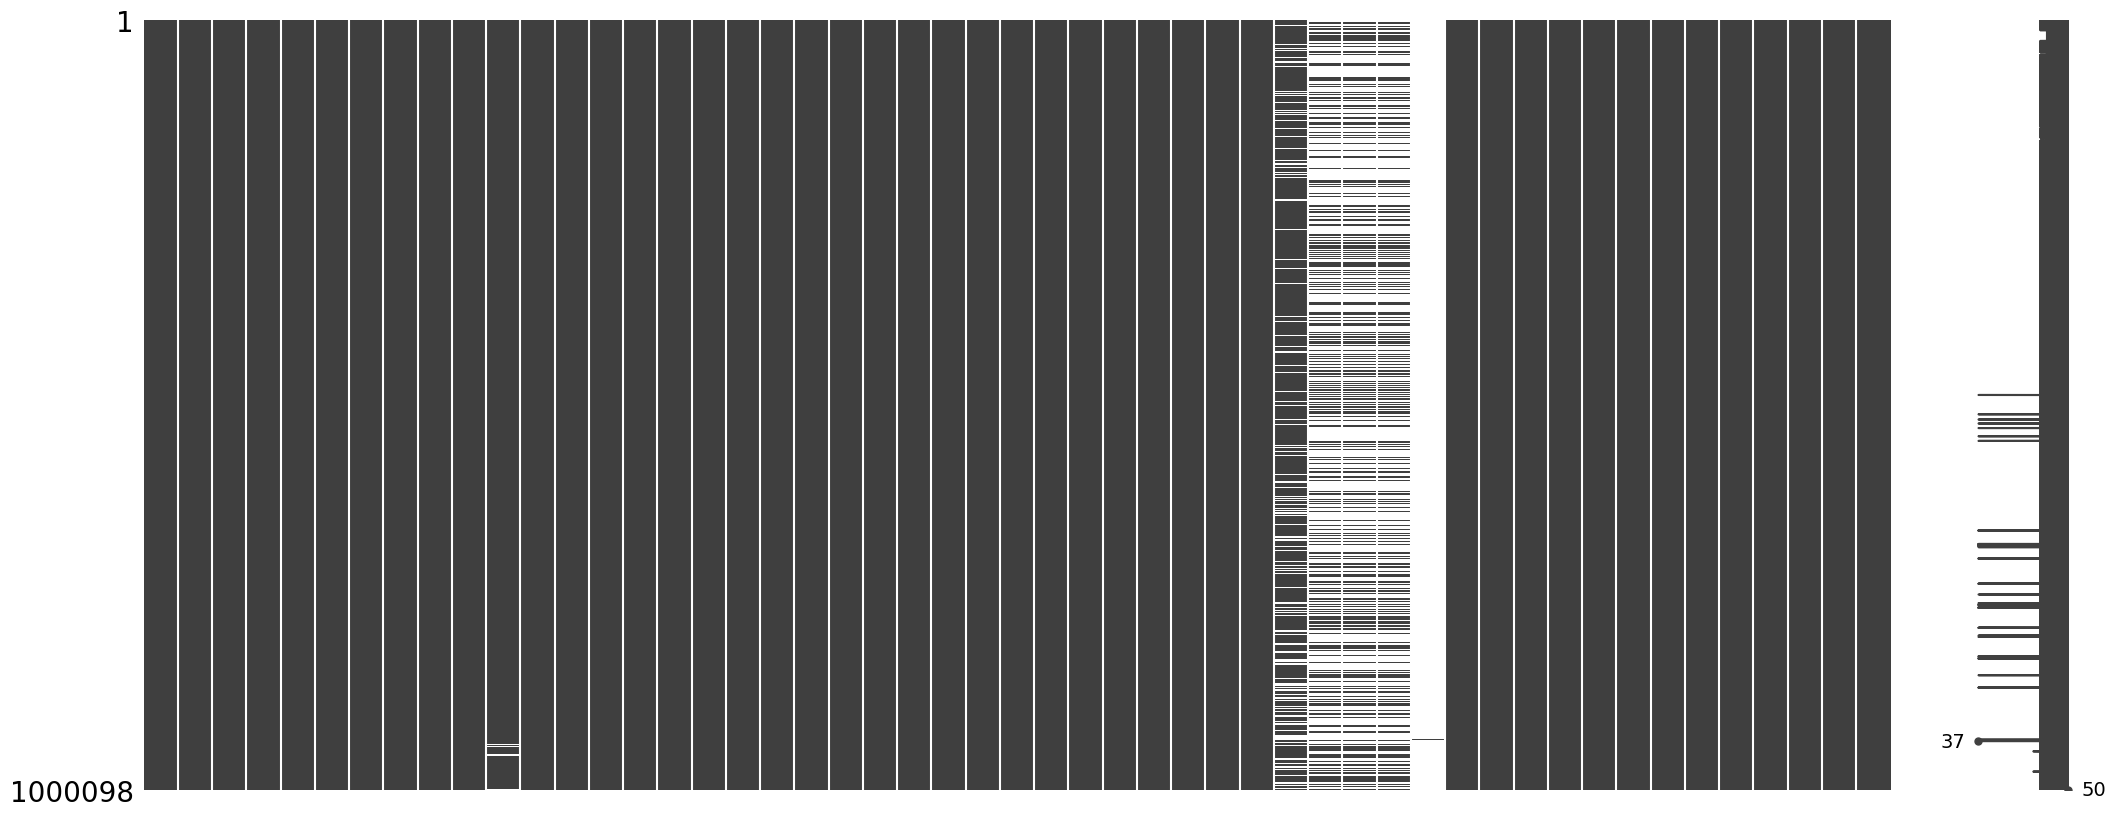

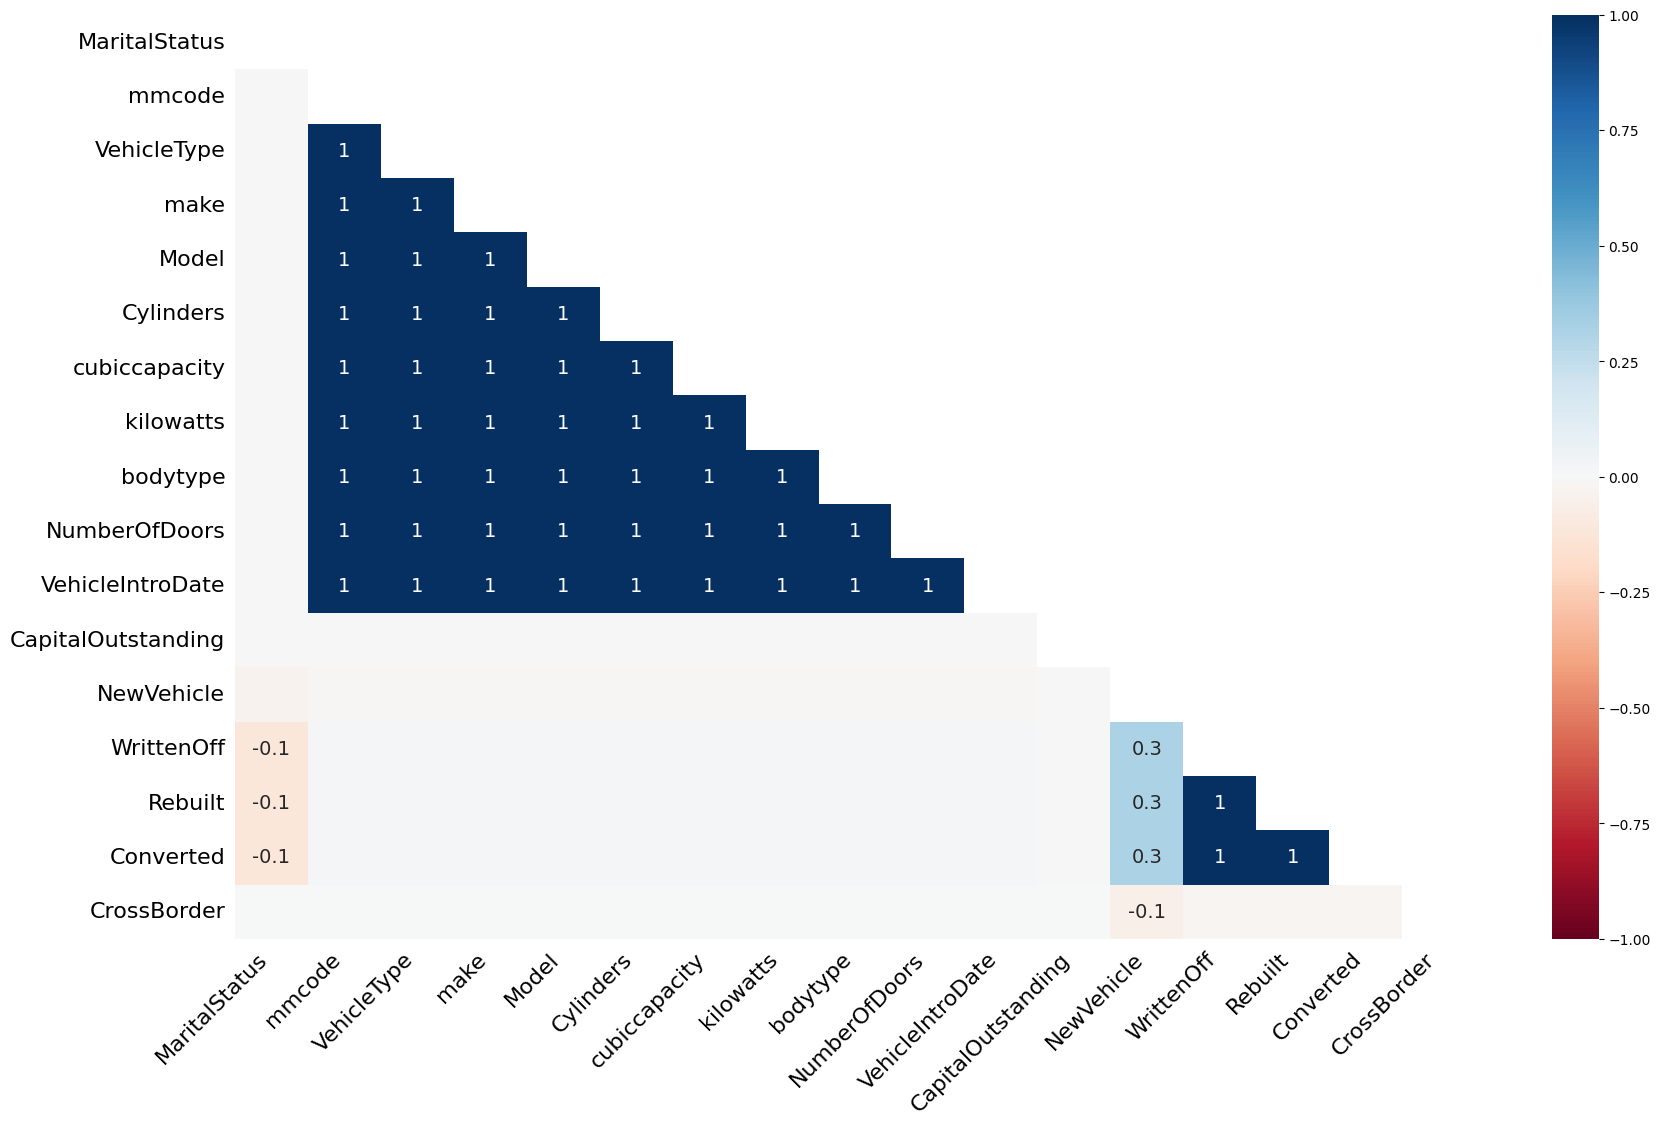

In [22]:
import missingno as msno

# Visualize missing data patterns
msno.matrix(df)
msno.heatmap(df)


In [23]:
df.info()  # Check the structure and data types
df.describe()  # Get basic statistics for numerical columns
df.head()  # View the first few rows to understand the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 51 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      1000098 non-null  object 
 9   AccountType               1000098 non-null  object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    1000098 non-null  object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


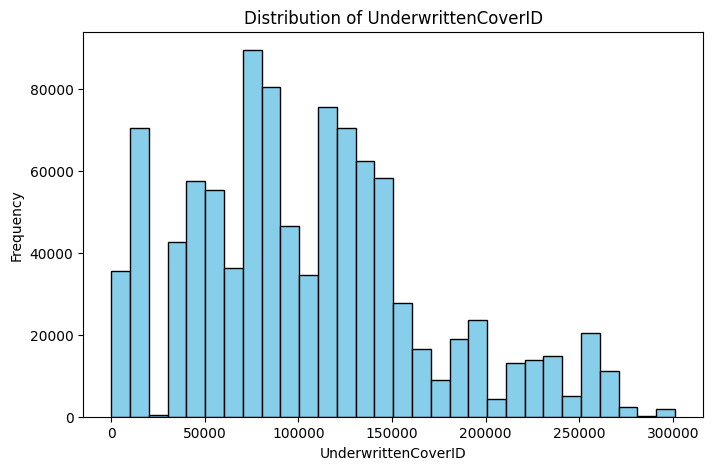

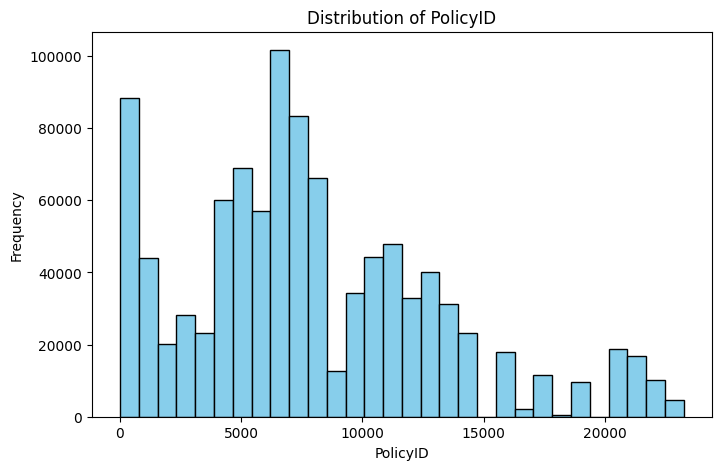

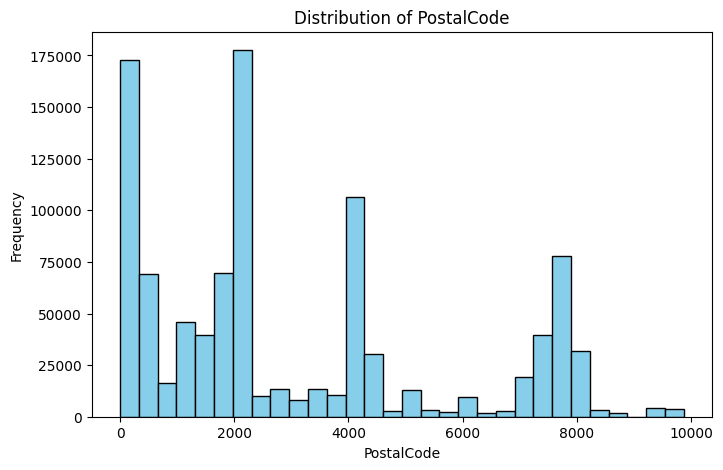

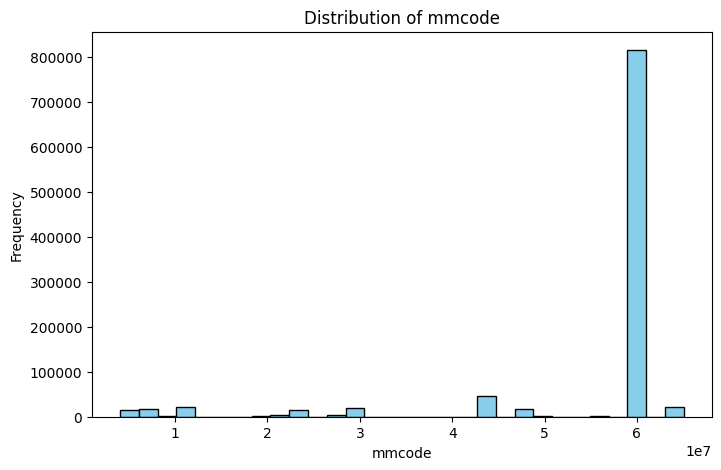

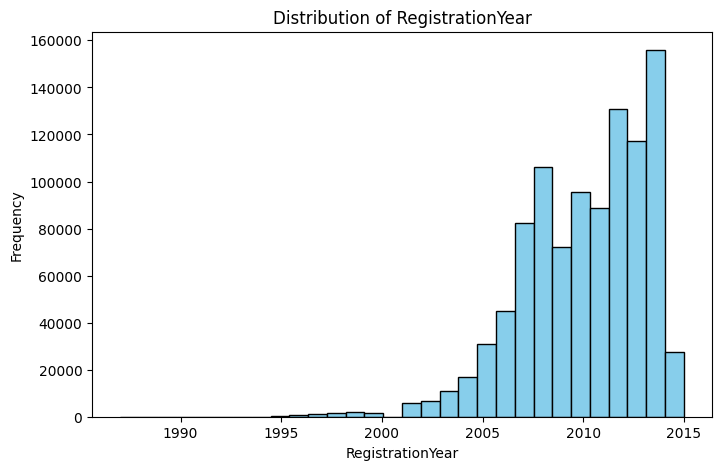

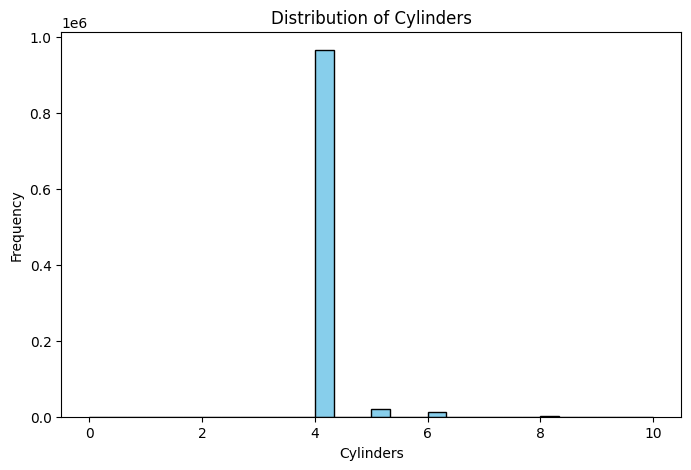

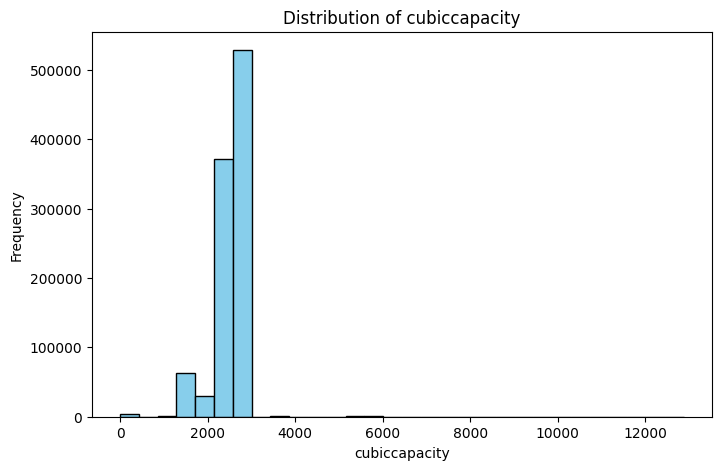

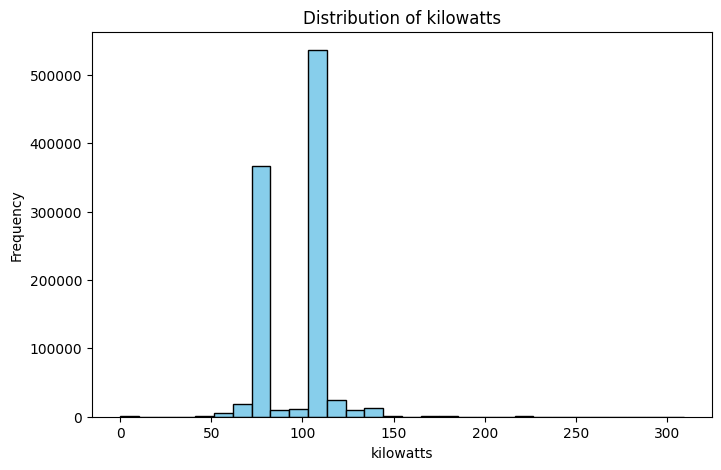

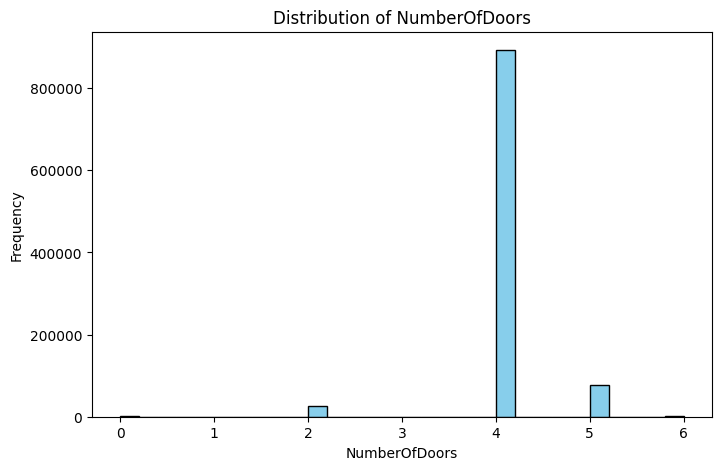

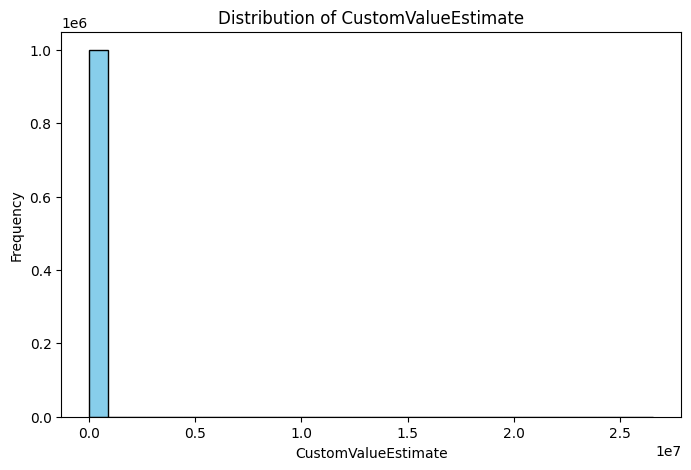

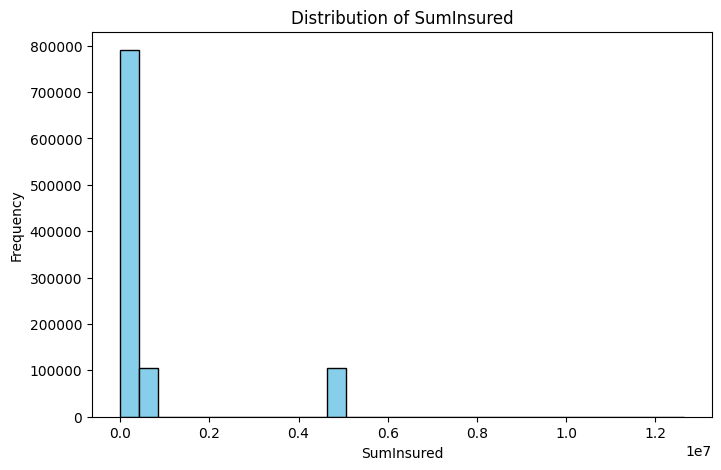

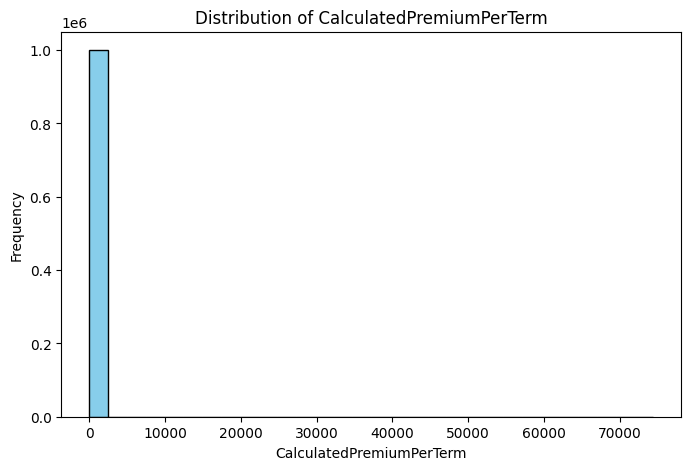

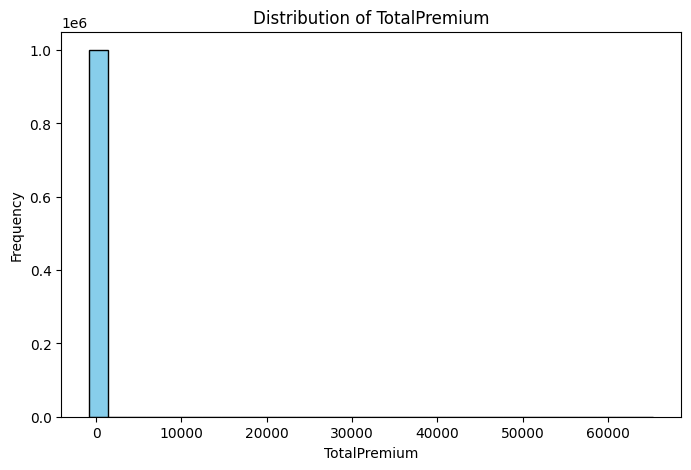

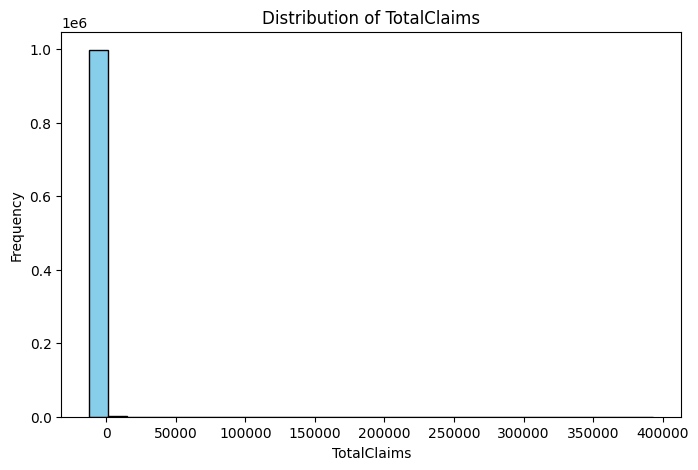

In [24]:
import matplotlib.pyplot as plt

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


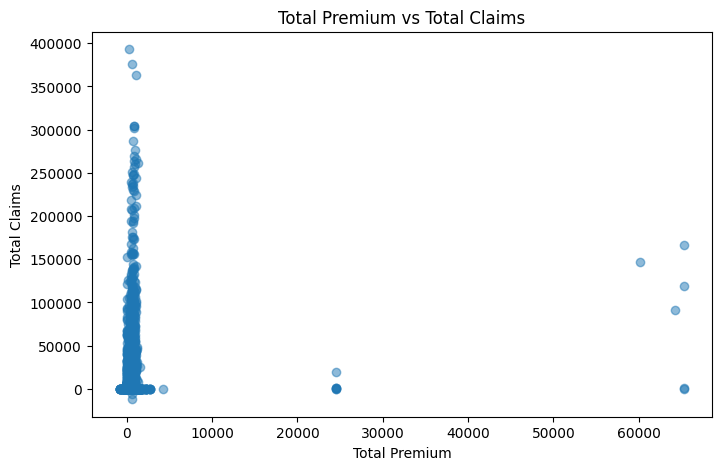

In [30]:
# Scatter plot for bivariate analysis between 'TotalPremium' and 'TotalClaims'
plt.figure(figsize=(8, 5))
plt.scatter(df['TotalPremium'], df['TotalClaims'], alpha=0.5)
plt.title('Total Premium vs Total Claims')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.show()


In [35]:
# Convert 'TransactionMonth' to datetime and then to numeric (number of days since the earliest date)
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
df['TransactionMonth'] = (df['TransactionMonth'] - df['TransactionMonth'].min()).dt.days


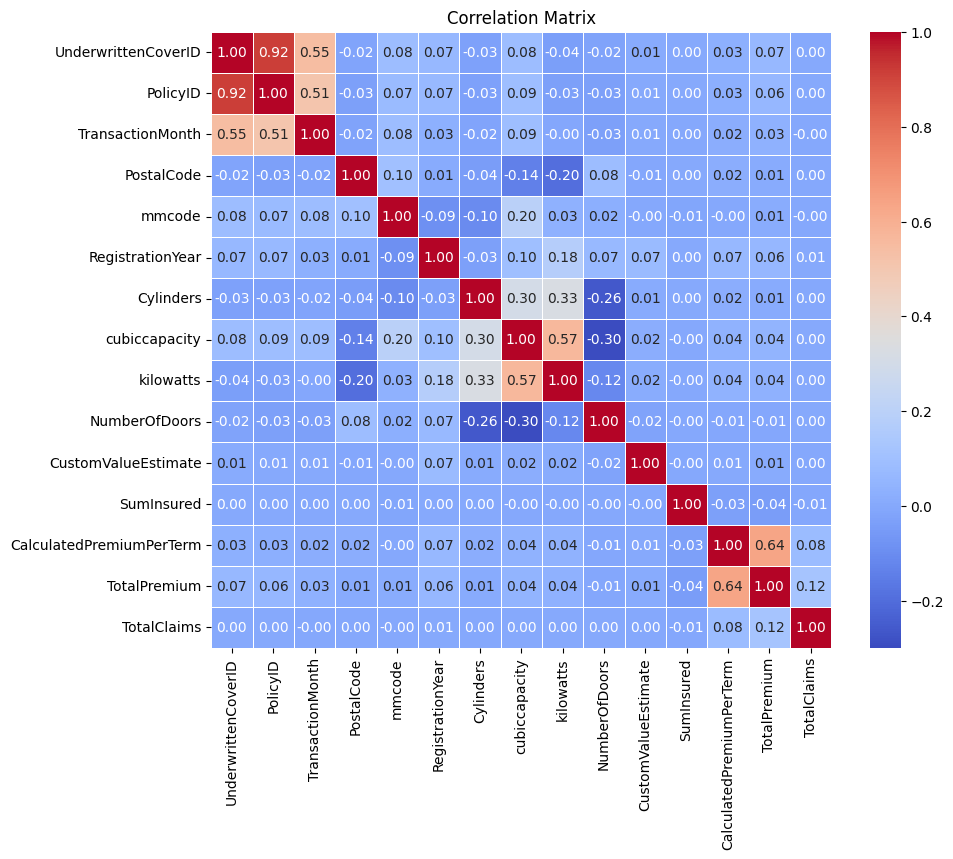

In [36]:
# Select only numeric columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numerical_columns]

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [37]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Assuming 'df' is your dataframe

# 1. Outlier Detection using IQR (Interquartile Range)
df_numeric = df.select_dtypes(include=['float64', 'int64'])  # Select numeric columns
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()
print(f"Outliers detected using IQR method:\n{outliers_iqr}")

# 2. Outlier Detection using Z-Score
z_scores = zscore(df_numeric)  # Calculate Z-scores
outliers_z = (abs(z_scores) > 3).sum(axis=0)  # Z-score threshold > 3 for outliers
print(f"Outliers detected using Z-score method:\n{outliers_z}")


Outliers detected using IQR method:
UnderwrittenCoverID           5717
PolicyID                     31232
TransactionMonth             26494
PostalCode                    8149
mmcode                      241512
RegistrationYear              7482
Cylinders                    34262
cubiccapacity                56939
kilowatts                     2175
NumberOfDoors               106708
CustomValueEstimate         217880
SumInsured                  104294
CalculatedPremiumPerTerm    175508
TotalPremium                209042
TotalClaims                   2793
dtype: int64
Outliers detected using Z-score method:
UnderwrittenCoverID          1961
PolicyID                        0
TransactionMonth            10091
PostalCode                      0
mmcode                          0
RegistrationYear             7482
Cylinders                       0
cubiccapacity                   0
kilowatts                       0
NumberOfDoors                   0
CustomValueEstimate           129
SumInsured  

<Figure size 1200x600 with 0 Axes>

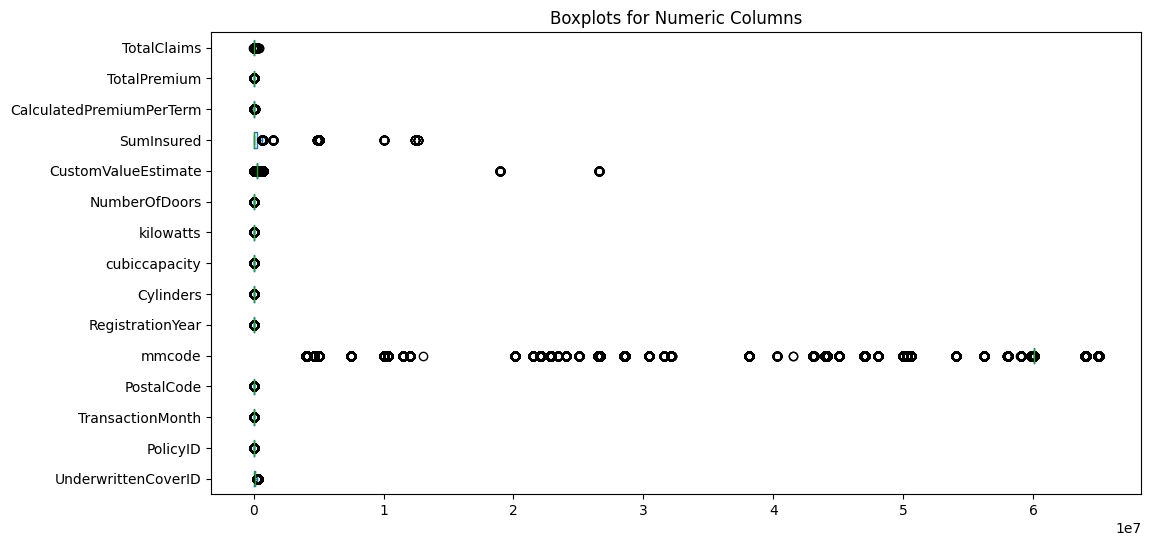

<Figure size 1200x800 with 0 Axes>

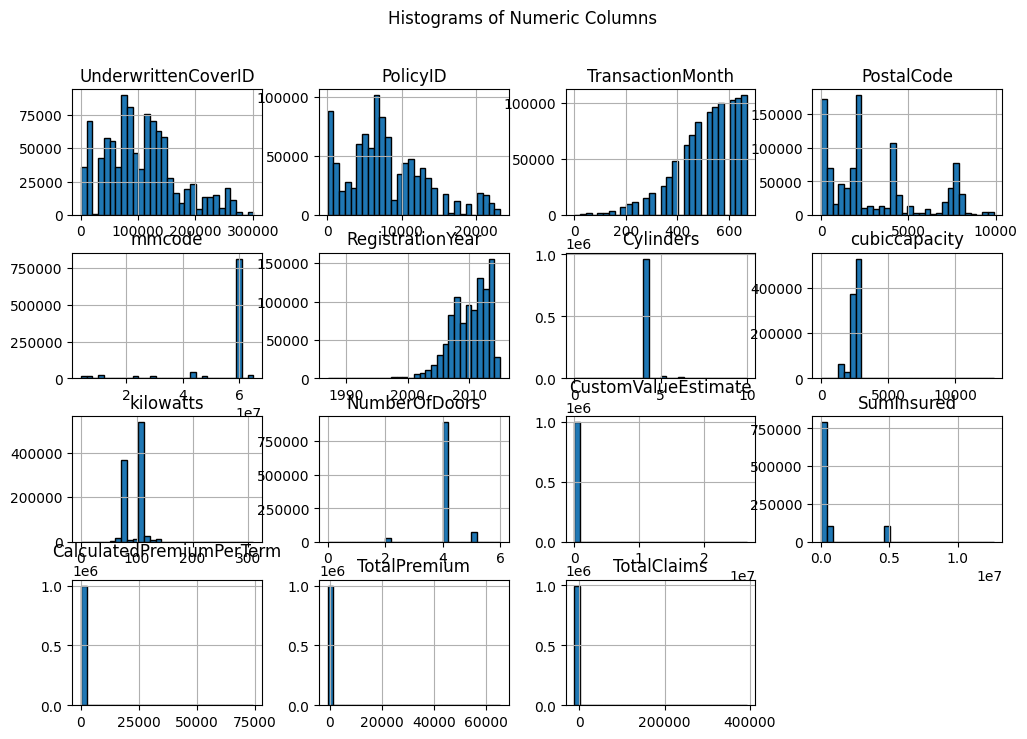

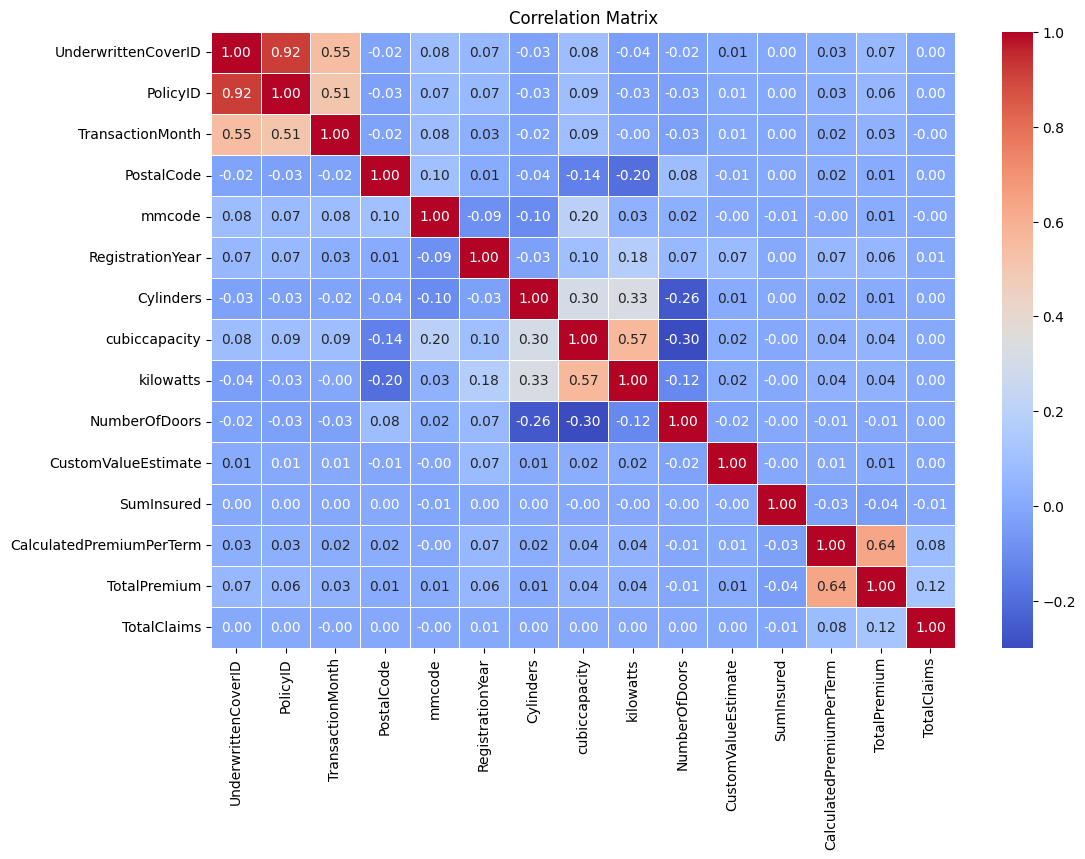

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Boxplot for detecting outliers in each numeric column
plt.figure(figsize=(12, 6))
df_numeric.plot(kind='box', vert=False, figsize=(12, 6))
plt.title('Boxplots for Numeric Columns')
plt.show()

# 2. Histogram for each numeric column to understand the distribution
plt.figure(figsize=(12, 8))
df_numeric.hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histograms of Numeric Columns')
plt.show()

# 3. Correlation Heatmap
correlation_matrix = df_numeric.corr()  # Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
